# ProtGPT2 in Colab



In [ ]:
#@title Run to install dependencies
!pip install transformers
!pip install biopython
from transformers import pipeline

protgpt2 = pipeline('text-generation', model="nferruz/ProtGPT2")

import torch
import math
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import numpy as np
import random

# Seed for reproducibility
seed_value = 42

random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
torch.use_deterministic_algorithms(True)

# Define the model and tokenizer
model = GPT2LMHeadModel.from_pretrained('nferruz/ProtGPT2')
tokenizer = GPT2Tokenizer.from_pretrained('nferruz/ProtGPT2')

# Define the function to calculate perplexity
def calculatePerplexity(sequence, model, tokenizer):
    # Tokenize the protein sequence
    input_ids = torch.tensor(tokenizer.encode(sequence)).unsqueeze(0)
    input_ids = input_ids.to(model.device)

    # Generate model predictions and calculate loss
    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
    loss, logits = outputs[:2]

    # Calculate perplexity
    return math.exp(loss)

# Functions for different peptide analyses from Bio.SeqUtils.ProtParam.ProteinAnalysis
# https://biopython.org/docs/1.75/api/Bio.SeqUtils.ProtParam.html
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def amino_acid_composition(protein_sequence):
    analysis = ProteinAnalysis(protein_sequence)
    return analysis.count_amino_acids()

def molecular_weight(protein_sequence):
    analysis = ProteinAnalysis(protein_sequence)
    return analysis.molecular_weight()

def instability_index(protein_sequence):
    analysis = ProteinAnalysis(protein_sequence)
    return analysis.instability_index()

def isoelectric_point(protein_sequence):
    analysis = ProteinAnalysis(protein_sequence)
    return analysis.isoelectric_point()

def gravy(protein_sequence):
    analysis = ProteinAnalysis(protein_sequence)
    return analysis.gravy()

def helix_percentage(protein_sequence):
    analysis = ProteinAnalysis(protein_sequence)
    return analysis.secondary_structure_fraction()[0]  # [helix, turn, sheet]

# Might come in handy
from Bio.Blast import NCBIWWW, NCBIXML

def run_blast(protein_sequence, database='swissprot', max_results=10):
    result_handle = NCBIWWW.qblast('blastp', database, protein_sequence)
    blast_records = NCBIXML.parse(result_handle)

    for record in blast_records:
        for idx, alignment in enumerate(record.alignments[:max_results]):
            print(f"****Alignment {idx + 1}****")
            print(f"Sequence ID: {alignment.accession}")
            print(f"Length: {alignment.length}")
            for hsp in alignment.hsps:
                print(f"E-value: {hsp.expect}")
                print("Query:")
                print(hsp.query[0:75] + "...")
                print("Match:")
                print(hsp.match[0:75] + "...")
                print("Subject:")
                print(hsp.sbjct[0:75] + "...")
            print("-" * 40)

from Bio import SeqIO
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/850 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/655k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/314k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/357 [00:00<?, ?B/s]

In [ ]:
#@title Run to mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title Define directory paths

import re
from os import listdir
from os.path import isfile, join

# Define path
# Exact path may differ
base_path = 'drive/MyDrive/ProtGPT2/'

input_folder_dir = 'in'
output_folder_dir = 'out'

path_to_fasta = f"{base_path}/{input_folder_dir}/"

def list_and_sort_files(path, pattern):
    filenames = [f for f in listdir(path) if isfile(join(path, f)) and pattern.match(f)]
    sorted_filenames = sorted(filenames, key=lambda x: int(re.search(r'\d+', x).group()))
    return sorted_filenames

literature_pattern = re.compile(r'^P\d{1,2}\.fasta$')  # Match filenames like P1.fasta, P45.fasta, etc.
homologous_pattern = re.compile(r'^K\d{1,2}\.fasta$')  # Match filenames like K1.fasta, K27.fasta, etc.

literature_fasta = list_and_sort_files(path_to_fasta, literature_pattern)
homologous_fasta = list_and_sort_files(path_to_fasta, homologous_pattern)

print("Literature Files:", literature_fasta)
print("Homologous Files:", homologous_fasta)

Literature Files: ['P1.fasta', 'P2.fasta', 'P3.fasta', 'P4.fasta', 'P5.fasta', 'P6.fasta', 'P7.fasta', 'P8.fasta', 'P9.fasta', 'P10.fasta', 'P11.fasta', 'P12.fasta', 'P13.fasta', 'P14.fasta', 'P15.fasta', 'P16.fasta', 'P17.fasta', 'P18.fasta', 'P19.fasta', 'P20.fasta', 'P21.fasta', 'P22.fasta', 'P23.fasta', 'P24.fasta', 'P25.fasta', 'P26.fasta', 'P27.fasta', 'P28.fasta', 'P29.fasta', 'P30.fasta', 'P31.fasta', 'P32.fasta', 'P33.fasta', 'P34.fasta', 'P35.fasta', 'P36.fasta', 'P37.fasta', 'P38.fasta', 'P39.fasta', 'P40.fasta', 'P41.fasta', 'P42.fasta', 'P43.fasta', 'P44.fasta', 'P45.fasta']
Homologous Files: ['K1.fasta', 'K2.fasta', 'K3.fasta', 'K4.fasta', 'K5.fasta', 'K6.fasta', 'K7.fasta', 'K8.fasta', 'K9.fasta', 'K10.fasta', 'K11.fasta', 'K12.fasta', 'K13.fasta', 'K14.fasta', 'K15.fasta', 'K16.fasta', 'K17.fasta', 'K18.fasta', 'K19.fasta', 'K20.fasta', 'K21.fasta', 'K22.fasta', 'K23.fasta', 'K24.fasta', 'K25.fasta', 'K26.fasta', 'K27.fasta']


# De novo protein generation
The model will generate the most probable sequences that follow the input.
## Parameters
*   **input** is a text string used as a seed for protein generation. It can be an existing amino acid sequence or a text string unrelated to biology.
*   **max_length** is a parameter controlling the maximum length of the protein sequence generated by the model. If the model generates a sequence longer than this value, the sequence will be truncated after max_length amino acids. Length is expressed in tokens, where each token has an average length of 4 amino acids.
*   **do_sample** is a boolean value indicating whether the sampling strategy is used to generate the protein sequence. If True, the model will generate protein sequences randomly based on the model's probability distribution. If False, the model will generate protein sequences deterministically.
*   **top_k** is a parameter controlling the number of highest probability tokens considered during sampling if do_sample is True.
*   **repetition_penalty** is a parameter used to penalize the repetition of amino acids in the generated sequence. The higher the value of repetition_penalty, the less likely the model will repeat an amino acid in the sequence.
*   **num_return_sequences** is a parameter indicating the number of protein sequences generated by the model.
*   **eos_token_id** is the ID of the token indicating the end of the protein sequence generated by the model. In this case, a value of 0 is used to indicate the end of the sequence.

## Output
*   **Generated sequence** The generated sequence is the output of the protein generation model, i.e., the amino acid sequence that the model has synthetically generated based on the input parameters. This sequence can be a completely new protein, not existing in nature, or a variant of an existing protein with minor modifications.

*   **Perplexity**: Perplexity is a measure of the quality of the generated sequence and is used to evaluate the language model used for generation. In the context of protein generation, perplexity measures the model's ability to generate coherent amino acid sequences similar to proteins present in nature. Lower perplexity indicates that the model has generated a high-quality sequence, while higher perplexity indicates that the generated sequence is of low quality or implausible. There is no standard threshold as to what perplexity value gives a 'good' or 'bad' sequence, but given the fast inference times, the best is to sample many sequences, order them by perplexity, and select those with the lower values (the lower the better).

*   **Hydrophobicity (GRAVY)**: Grand Average of Hydropathicity index (Kyte and Doolittle, 1982) is a measure used to assess the hydrophobicity or hydrophilicity of a protein or peptide. It is calculated as the sum of hydropathy values of all the amino acids, divided by the number of residues in the sequence. Hydropathy values are assigned to each amino acid based on their hydrophobicity or hydrophilicity. The more positive the value, the more hydrophobic the amino acid, and conversely, the more negative the value, the more hydrophilic the amino acid. For a peptide to be considered for therapeutic use, it should ideally have a **balance between hydrophobic and hydrophilic properties**. This balance is crucial for the peptide’s solubility, stability, and ability to interact with its target.

*   **Instability index**: Implementation of the method of Guruprasad et al. 1990 to test a protein for stability. Any **value above 40 means the protein is unstable** (has a short half life).

*   **Isoelectric point**: pI of a peptide is the pH at which the molecule carries no net electrical charge. It is determined by the composition of amino acids in the peptide, each of which has its own pKa value. At a pH below their pI, peptides carry a net positive charge; above their pI, they carry a net negative charge. It provides insights into protein solubility, stability, and separation conditions. It can help inform which conditions will increase or decrease aggregation potential, or lead to better solubility and generally easier handling. The exact **value depends on the specific use case** of the peptide as a therapeutic.

In [ ]:
#@title Define model parameters

max_length = 30 #@param {type:"number"}
do_sample = True #@param {type:"boolean"}
top_k = 950 #@param {type:"number"}
repetition_penalty = 1.2 #@param {type:"number"}
num_return_sequences = 50 #@param {type:"number"}
eos_token_id = 0 #@param {type:"number"}

def generate_sequences(record):

  seq_id = record.id
  input = str(record.seq).replace("X","") # ignore amino acid X

  print(f"Sequence generation for {seq_id}: {input}\n")

  sequences = protgpt2(input,
                      max_length=max_length,
                      do_sample=do_sample,
                      top_k=top_k,
                      repetition_penalty=repetition_penalty,
                      num_return_sequences=num_return_sequences,
                      eos_token_id=eos_token_id)

  result = {"seq": [],
            "mass": [],
            "pI": [],
            "instab": [],
            "gravy": [],
            "ppl": [],
            "source": []}

  for seq in sequences:
      sequence = (seq['generated_text'].replace("\n", "").replace("X",""))

      # Calculate sequence evaluation metrics
      mass = molecular_weight(sequence)
      pI = isoelectric_point(sequence)
      instability = instability_index(sequence)
      hydrophobicity = gravy(sequence)
      ppl = calculatePerplexity(sequence, model, tokenizer)

      # # Print results
      # print(f"Generated sequence:\n{seq['generated_text']}")
      # print(f"\nMolecular weight: {mass}\n")
      # print(f"\nIsoelectric point: {pI}")
      # print(f"\nInstability index: {instability}")
      # print(f"\nHydrophobicity (GRAVY): {hydrophobicity}")
      # print(f"\nPerplexity: {ppl}")
      # print("-" * 80)

      # Save results
      result["seq"].append(sequence)
      result["mass"].append(mass)
      result["pI"].append(pI)
      result["instab"].append(instability)
      result["gravy"].append(hydrophobicity)
      result["ppl"].append(ppl)
      result["source"].append(seq_id)

  return result

In [ ]:
#@title Generate sequences

generated_sequences_dict = {"seq": [],
            "mass": [],
            "pI": [],
            "instab": [],
            "gravy": [],
            "ppl": [],
            "source": []}

all_fasta = literature_fasta + homologous_fasta

for filename in all_fasta:
    filepath = join(path_to_fasta, filename)

    # Read the single sequence from the fasta file
    record = SeqIO.read(filepath, "fasta")

    result = generate_sequences(record)

    # Save results
    for col in result.keys():
      generated_sequences_dict[col] += result[col]

# Convert to pandas DatFrame
generated_sequences = pd.DataFrame.from_dict(generated_sequences_dict, orient="columns")
generated_sequences.to_csv(f"{base_path}/{output_folder_dir}/results_all.tsv", sep="\t", index=False)
generated_sequences.head()

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P1: SVFSGYRK



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P2: CLANGMIMY



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P3: RQQPGKGPRY



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P4: ALEATCKSL



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P5: LDAQSAPLRV



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P6: FLRQNEVL



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P7: IDALNENK



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P8: DIEQLRSQL



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P9: IQKVAGTW



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P10: TLPFHSVIY



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P11: VLEKYKDVI



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P12: LVGPTIWR



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P13: RFPRPVY



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P14: DFVCRAFQY



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P15: YLYQGPIVL



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P16: HMWPGDIK



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P17: ALKIPISKIY



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P18: LTFQHNF



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P19: ALTEGLPEL



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P20: VLMKDVQEI



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P21: KLTCNLTR



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P22: WVRQAPGKALE



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P23: SYFSGLDPYL



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P24: IIVTQTMK



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P25: LWGYTDPFL



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P26: ILGFHANE



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P27: QIPTVNNL



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P28: AIKIPLL



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P29: ALQDIIGSL



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P30: ILFYVKEF



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P31: ITGFYPEE



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P32: GLKAVFPLL



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P33: EIIESPLF



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P34: GYFYPIQI



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P35: LSITENGEFK



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P36: GWLEPLL



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P37: SLPYPFI



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P38: YVHPFHL



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P39: GLLPGLMVY



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P40: GLDIQK



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P41: HLSPNDPIF



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P42: MIQLDLI



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P43: SFVSEVPEL



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P44: GLPFPPEL



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for P45: LHTPLPL



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K1: CHWLRGDMRRC



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K2: QHWSYGLRPG



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K3: YCKFEWATFAKSC



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K4: LEDGRTLSDY



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K5: YYDPETGTWY



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K6: GYDPETGTWG



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K7: LCTASIPPQCY



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K8: WNPADYGGIK



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K9: HEGFTSDF



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K10: GNHWAVGHLM



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K11: ALLVTAGLVLA



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K12: CYCSLRGDCYC



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K13: GCCSDPRCAWRC



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K14: FATMRYPSDSDE



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K15: CCELCCNPACTGC



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K16: CKFFWATYTSC



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K17: CCDVCCNPACAKC



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K18: TCEICAYAACTGC



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K19: CELCCNPGCAGC



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K20: ICCNPACGPKYSC



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K21: CGSCYPCSCM



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K22: CKFAWATYTSC



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K23: CELCCNPACAGC



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K24: RFTGHFGGLYPCK



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K25: GASDPRCAWRC



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K26: CELCCNPLCAGC



Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


Sequence generation for K27: GCCSDPLCAWRC



,seq,mass,pI,instab,gravy,ppl,source
0,SVFSGYRKHNRSDPDNYLPTLDNRDMMIYVQARDKFVHFRNCDDPK...,8273.3001,8.887176,21.524286,-0.804286,9622.310717,P1
1,SVFSGYRKVLKYLNDAGEAVAIDIRNLPASIRLRWRVSLS,4535.2132,10.407857,29.120000,0.040000,1295.329159,P1
2,SVFSGYRKFEHDVKAKEWILRVRRGFPKV,3536.0960,10.533699,25.941379,-0.627586,1939.887879,P1
3,SVFSGYRKALLCDWKK,1901.2351,9.626306,5.537500,-0.312500,6312.951410,P1
4,SVFSGYRKIKPELDPKVAAALKINQITLGKIALGNYNE,4160.8123,9.601486,-14.215789,-0.163158,1456.187453,P1


## Evaluation of the Model and the Generated Peptides

In [ ]:
import pandas as pd

# Column names in the dataframe for reference
# columns = ["seq",	"mass",	"pI",	"instab",	"gravy",	"ppl",	"source"]

# Run this line if sequence generation was already conducted
# Need to run code cell with directory paths before running this cell
generated_sequences = pd.read_csv(f"{base_path}/{output_folder_dir}/results_all.tsv", sep="\t")

generated_sequences.sample(n=5) # Display random 5 rows


,seq,mass,pI,instab,gravy,ppl,source
1340,QIPTVNNLDILTGFCWIILYFAIFAVNFLTRYTLTFLFERKYAFFN...,8714.2862,9.807334,23.916216,0.754054,8713.027649,P27
1601,EIIESPLFAFLDEKLGYERAAKLYHQMTVDERDRLLKKMKDLEKNP...,8803.9847,6.142385,42.980000,-0.693333,10220.668207,P33
3549,CELCCNPLCAGC,1228.5060,4.050028,6.766667,1.075000,4296.375989,K26
3575,GCCSDPLCAWRCAPLTPLGSRWACACPRGFFRRSVKAACQGRVATS...,5664.6231,9.193272,83.333333,0.242593,719.164207,K27
211,LDAQSAPLRVAFGEDRHALLRWLRAEAQAKLPRDESARLMRRVAAE...,8737.8772,11.533797,57.459740,-0.546753,31509.478070,P5


In [ ]:
import matplotlib.pyplot as plt

generated_sequences['seq_length'] = generated_sequences['seq'].apply(len)
numerical_columns = generated_sequences.select_dtypes(include='number').columns
numerical_columns

Index(['mass', 'pI', 'instab', 'gravy', 'ppl', 'seq_length'], dtype='object')

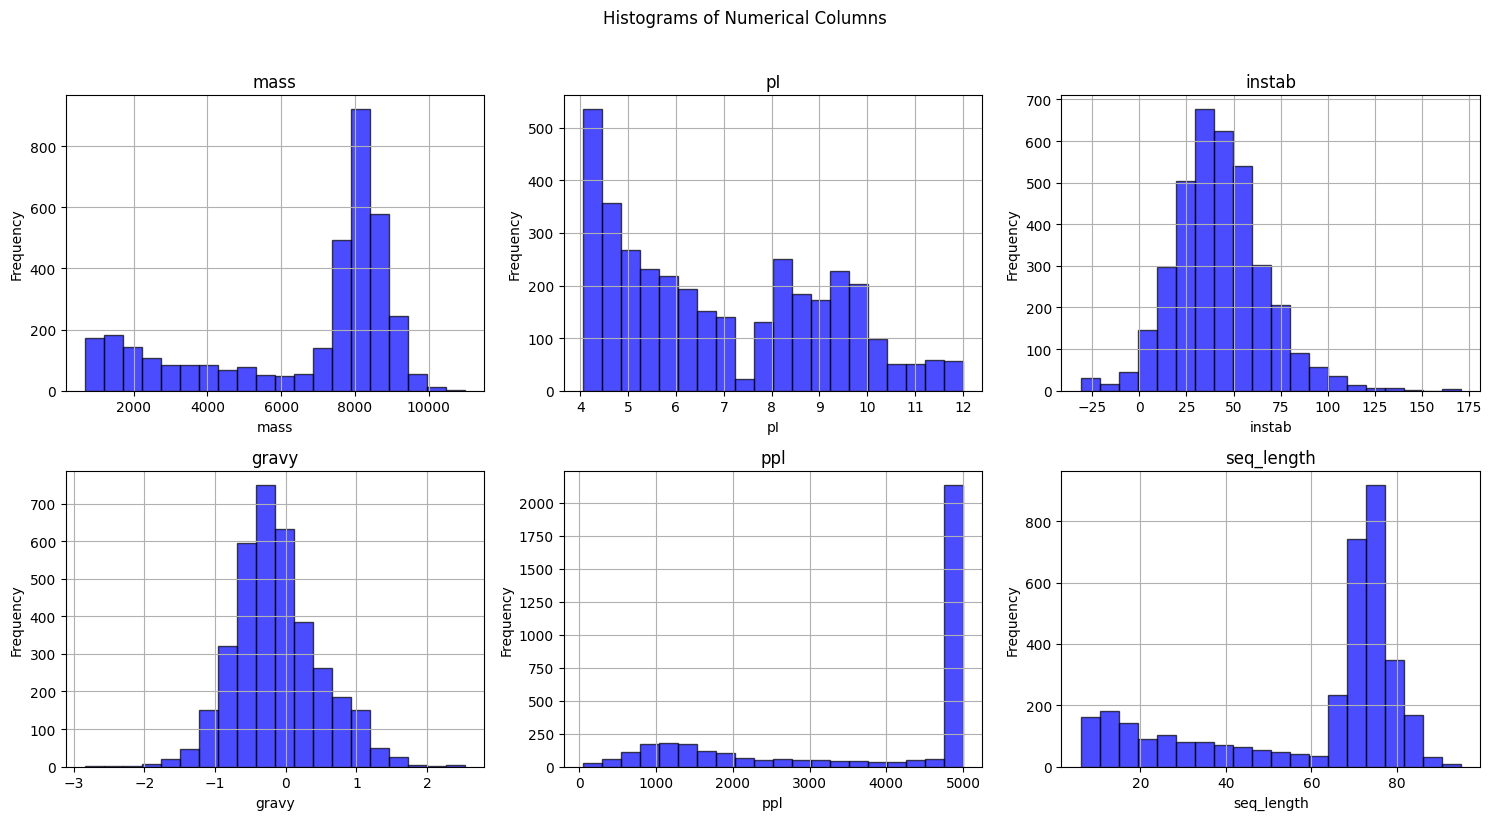

In [ ]:
import numpy as np

fig, axes = plt.subplots(nrows=2, ncols=len(numerical_columns)//2, figsize=(15, 8))
fig.suptitle('Histograms of Numerical Columns', y=1.02)

for ax, column in zip(axes.flatten(), numerical_columns):

    if column == "ppl":
      # Making perplexity histogram more readable
      max_value = 5000 # cap values above this
      ax.hist(np.clip(generated_sequences[column], 0, max_value), bins=20, color='blue', edgecolor='black', alpha=0.7)

    else:
      ax.hist(generated_sequences[column], bins=20, color='blue', edgecolor='black', alpha=0.7)

    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#@title Selecting generated sequences

# Filter by sequence length, instability index, hydrophobicity and pI
selected_sequences = generated_sequences[
    (generated_sequences['seq'].str.len().between(16, 30, inclusive='both')) &
    (generated_sequences['instab'] < 40) &
    (generated_sequences['gravy'].between(-1., 1., inclusive='both')) &
    (generated_sequences['pI'].between(6, 8, inclusive='both'))
]

print(f"Number of sequences that passed preliminary filters: {selected_sequences.shape[0]}")

Number of sequences that passed preliminary filtration: 22


In [ ]:
# Selection by perplexity and unique source
final_selection = selected_sequences.sort_values(by='ppl', ascending=True).drop_duplicates(subset='source', keep='first').head(20)
final_selection

,seq,mass,pI,instab,gravy,ppl,source,seq_length
1842,SLPYPFIWGNQMWMLTWPDHR,2676.0791,6.460570,21.700000,-0.485714,844.699757,P37,21
775,HMWPGDIKPAAVSRDLSQ,2008.2608,6.747038,32.638889,-0.566667,868.129357,P16,18
1165,IIVTQTMKSGDVSVILHQIHYKAD,2697.1135,6.922614,27.304167,0.216667,904.704280,P24,24
2640,WNPADYGGIKPLLTETNIVGKY,2449.7542,6.067528,19.663636,-0.386364,1007.955175,K8,22
3592,GCCSDPLCAWRCHAGRCGRD,2166.4707,7.843627,25.800000,-0.415000,1020.435437,K27,20
3048,CKFFWATYTSCCLSGGNLGIFVPS,2602.0139,7.948775,35.508333,0.741667,1063.468200,K16,24
1714,LSITENGEFKPLGFQFSQKSIEKV,2727.0716,6.228155,18.454167,-0.375000,1089.335685,P35,24
558,LVGPTIWRAALLESAPRHAAE,2258.5777,6.772502,29.404762,0.185714,1100.547351,P12,21
2864,GCCSDPRCAWRCYGCLS,1880.1796,7.826156,11.311765,-0.035294,1200.327451,K13,17
820,ALKIPISKIYIDSHSVLSPE,2210.5679,6.808766,35.615000,0.295000,1287.759076,P17,20


In [ ]:
#@title Save results

try:
  import Bio
except:
  !pip install biopython

from Bio import SeqIO, Seq

final_selection.to_csv(f"{base_path}/{output_folder_dir}/results_final.tsv", sep="\t", index=False)

n = 1
# Save each sequence to a separate FASTA file
for i, row in final_selection.iterrows():
    identifier = f'G{n}'
    n += 1
    sequence = row['seq']

    # Create a SeqRecord
    seq_record = SeqIO.SeqRecord(Seq.Seq(sequence), id=identifier, description="")

    # Save to a FASTA file
    output_filename = f'{identifier}.fasta'
    with open(f"{base_path}/{output_folder_dir}/{output_filename}", 'w') as output_file:
        SeqIO.write(seq_record, output_file, 'fasta')

    print(f'Sequence {identifier} saved to {output_filename}')

Sequence G1 saved to G1.fasta
Sequence G2 saved to G2.fasta
Sequence G3 saved to G3.fasta
Sequence G4 saved to G4.fasta
Sequence G5 saved to G5.fasta
Sequence G6 saved to G6.fasta
Sequence G7 saved to G7.fasta
Sequence G8 saved to G8.fasta
Sequence G9 saved to G9.fasta
Sequence G10 saved to G10.fasta
Sequence G11 saved to G11.fasta
Sequence G12 saved to G12.fasta
Sequence G13 saved to G13.fasta
Sequence G14 saved to G14.fasta
Sequence G15 saved to G15.fasta
Sequence G16 saved to G16.fasta
Sequence G17 saved to G17.fasta
Sequence G18 saved to G18.fasta
Sequence G19 saved to G19.fasta
Sequence G20 saved to G20.fasta


## Further reading

[ProtGPT2 Hugging Face](https://huggingface.co/nferruz/ProtGPT2)

[ProtGPT2 training data - Uniref50 (UR50) dataset version 2021/04](https://huggingface.co/datasets/nferruz/UR50_2021_04)

[ProtGPT2 is a deep unsupervised language model for protein design](https://pubmed.ncbi.nlm.nih.gov/35896542/)